### 코로나 바이러스 (COVID19)의 영향으로 외국인 관광객이 얼마나 줄었을까?

#### 월별 외국인 관광객 통계에 대한 데이터를 수집하고 전처리하여 시각화까지

In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

###### 1. 데이터 형태 파악

In [2]:
##  엑셀파일을 통해 확인

###### 2. 엑셀 데이터 불러오기

In [37]:
import pandas as pd 
kto_201901 = pd.read_excel('Data/kto/kto_201901.xlsx', header=1,usecols='A:G', 
                                                                        skipfooter=4)
kto_201901.head()

## header=1 : '엑셀파일의 두번째 행이 열이름이다'라는 뜻
## usecols='A:G' : 엑셀파일의 A열에서 G열까지 사용
## skipfooter=4 : 엑셀파일의 마지막 4개행은 가져오지 않는다

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [38]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


###### 3. 데이터 전처리

In [39]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [40]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [41]:
# 각 컬럼에서 0인 부분을 필터링

kto_201901[(kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | \
           (kto_201901['공용'] == 0)| (kto_201901['유학/연수'] == 0) ]


,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [42]:
# 기준년월 컬럼 생성 
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [43]:
# unique() 함수 활용하여 국적 알아보기 
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [44]:
# 대륙 목록 만들기 
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [45]:
# 데이터에서 대륙 목록에 해당하는 값 제외

kto_201901_country = kto_201901[   kto_201901.국적.isin(continents_list) == False   ]

kto_201901_country['국적'].unique()


array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [46]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [47]:
# index 재설정
kto_201901_country_newindex =  kto_201901_country.reset_index(drop=True) 
kto_201901_country_newindex.head()

## reset_index(drop=True) : 기존 인덱스를 제거하고, 새로운 인덱스로 재설정

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [48]:
# 대륙 컬럼값 만들기
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + \
                                            ['아프리카']*2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [49]:
# 대륙 컬럼 생성
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [50]:
# 관광객비율(%) 컬럼 생성 
kto_201901_country_newindex['관광객비율(%)']= round(kto_201901_country_newindex['관광'] / \
                                          kto_201901_country_newindex['계'] * 100, 1)

kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [51]:
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
19,이스라엘,727,12,0,9,57,805,2019-01,아시아,90.3
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아,89.6
23,GCC,1550,37,14,72,103,1776,2019-01,아시아,87.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
34,스웨덴,844,29,6,18,85,982,2019-01,유럽,85.9


In [52]:
# pivot_table() 함수 활용하여 
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)',
                                       index = '대륙',
                                       aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [53]:
# 중국 국적만 필터링 
kto_201901_country_newindex[kto_201901_country_newindex['국적'] == '중국']


# condition = kto_201901_country_newindex['국적'] == '중국'
# kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [54]:
# 유학/연수 인원이 1000명 이상 데이터만 필터링 

kto_201901_country_newindex[kto_201901_country_newindex['유학/연수'] >= 1000]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
10,베트남,10739,763,110,1667,6904,20183,2019-01,아시아,53.2
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [55]:
# 2019년 1월, 우리나라 방문한 전체 외국인 관광객 숫자
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum 

884293

In [56]:
# 전체비율(%) 컬럼 생성
kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광'] \
                                                       / tourist_sum * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [57]:
#  1. 엑셀파일의 경로 지정
#  2. 엑셀파일 불러오기
#  3. "기준년월"컬럼 추가
#  4. "국적"컬럼에서 대륙 제거하고 국가만 남기기
#  5. "대륙"컬럼 추가
#  6. 국가별 "관광객비율(%)"컬럼 추가
#  7. "전체비율(%)"컬럼 추가
#  8. 결과 출력

###### 4. 데이터 전처리 과정을 함수로 만들기

In [58]:
mm = 1 
print(mm)

1


In [59]:
# zfill() 함수 이용 (0을 포함한 두 자리로 출력하기)
print(str(mm).zfill(2))
print(str(mm).zfill(3))
print(str(mm).zfill(4))

01
001
0001


In [60]:
m=str(mm).zfill(2)
print('{}{}'.format(2020, m))

n=10
n=str(n).zfill(2)
print('{}{}'.format(2020, n))

202001
202010


In [61]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [62]:
## 예 (X)
# for yy in range(2010, 2021):
#     if yy < 2020:
#         for mm in range(1, 13):
#             mm_str = str(mm).zfill(2)
#             create_kto_data(yy, mm_str)
#     else:
#         for mm in range(1, 6):
#             mm_str = str(mm).zfill(2)
#             create_kto_data(yy, mm_str)

In [63]:
# create_kto_data 함수 생성

def create_kto_data(yy, mm):  
    # 1. Excel 파일 경로 지정
    file_path = 'Data/kto/kto_{}{}.xlsx'.format(yy, mm)
    
    # 2. Excel 파일 불러오기 
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. "기준년월" 컬럼 추가 
    df['기준년월'] = '{}-{}'.format(yy, mm) 
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] # 제거할 대륙명
    condition = (df['국적'].isin(ignore_list) == False) 
    df_country = df[condition].reset_index(drop=True) 
    
    # 5. "대륙" 컬럼 추가 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    # 대륙 컬럼 생성을 위한 목록 만들기 
    df_country['대륙'] = continents 
    
    # 6. 국가별 "관광객비율(%)" 컬럼 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1) 
                       
    # 7. "전체비율(%)" 컬럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력
    return(df_country) 


In [64]:
# create_kto_data() 함수를 활용해서 2018년 1월 데이터 불러오기  
kto_test = create_kto_data(2020, str(5).zfill(2))
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,45,105,3,41,219,413,2020-05,아시아,10.9,0.7
1,대만,31,8,3,33,114,189,2020-05,아시아,16.4,0.5
2,홍콩,6,5,0,2,11,24,2020-05,아시아,25.0,0.1
3,마카오,0,0,0,1,0,1,2020-05,아시아,0.0,0.0
4,태국,25,7,0,13,150,195,2020-05,아시아,12.8,0.4


###### 5. 반복문(for문)을 통해 다수(125개)의 엑셀 데이터 불러와서 합치기

In [65]:
# 통합 데이터를 저장할  변수 생성

df = pd.DataFrame()

In [71]:
for yy in range(2010, 2021):
    for mm in range(1, 13):    # try 이하 구문을 12번 실행         
        try:
            # create_kto_data 함수로 Excel 데이터를 temp 에 불러오기 
            temp = create_kto_data(str(yy), str(mm).zfill(2))

            # temp 로 불러온 데이터를 df 에 추가하기 
            # df = df.append(temp, ignore_index=True)
            df = pd.concat([df, temp])
        
        except:     # 만약 try 구문에서 에러가 발생하면 except 이후를 실행 
            pass

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 59
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 703.1+ KB


###### 6. 통합 데이터를 엑셀 파일로 저장

In [73]:
df.to_excel('Data/kto/kto_total.xlsx', index = False)

###### 7. 국적별 필터링된 데이터를 엑셀 파일로 저장

In [74]:
df_filter = df[df['국적'] == '중국']
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
17,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
17,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
17,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
17,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


In [77]:
# 중국인 관광객데이터를 엑셀 파일로 저장 

file_path = 'Data/kto/[국적별 관광객 데이터]_중국.xlsx'
df_filter.to_excel(file_path, index = False)

In [79]:
# 국가 리스트 만들기

country_list = df['국적'].unique()
country_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [80]:
for country in country_list: 
    df_filter=df[df['국적']==country]   ## 국적으로 필터링
    
    file_path = 'Data/kto/[국적별 관광객 데이터]_{}.xlsx'.format(country)
    df_filter.to_excel(file_path, index = False) 

### 데이터 시각화

In [82]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [83]:
df = pd.read_excel('Data/kto/kto_total.xlsx')

In [84]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [86]:
# 중국 국적 데이터 시각화

condition = ( df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


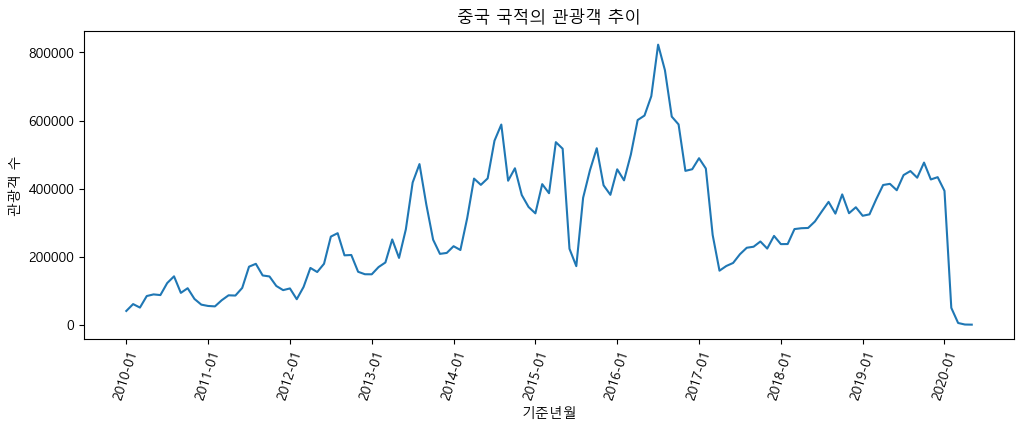

In [90]:
plt.figure(figsize = (12,4))
plt.plot(df_filter['기준년월'], df_filter['관광'])

plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')

plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'], rotation = 72, fontsize = 10)
# plt.xticks(df_filter['기준년월'], rotation = 90, fontsize = 4)
plt.show()

In [91]:
condition = ( df['국적'] == '일본')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
60,일본,224475,1455,63,1172,3197,230362,2010-02,아시아,97.4,50.3
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
180,일본,233697,1282,74,154,3868,239075,2010-04,아시아,97.8,43.0
240,일본,233311,1480,150,216,6538,241695,2010-05,아시아,96.5,44.4


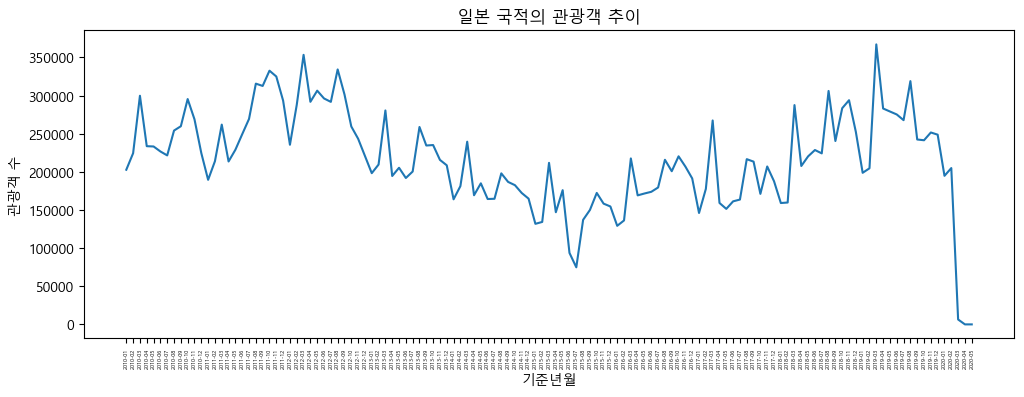

In [92]:
plt.figure(figsize = (12,4))
plt.plot(df_filter['기준년월'], df_filter['관광'])

plt.title('일본 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')

# plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'], rotation = 72, fontsize = 10)
plt.xticks(df_filter['기준년월'], rotation = 90, fontsize = 4)
plt.show()

In [94]:
df_filter1 = df[df['국적'] == '중국']
df_filter2 = df[df['국적'] == '일본']
df_filter3 = df[df['국적'] == '미국']

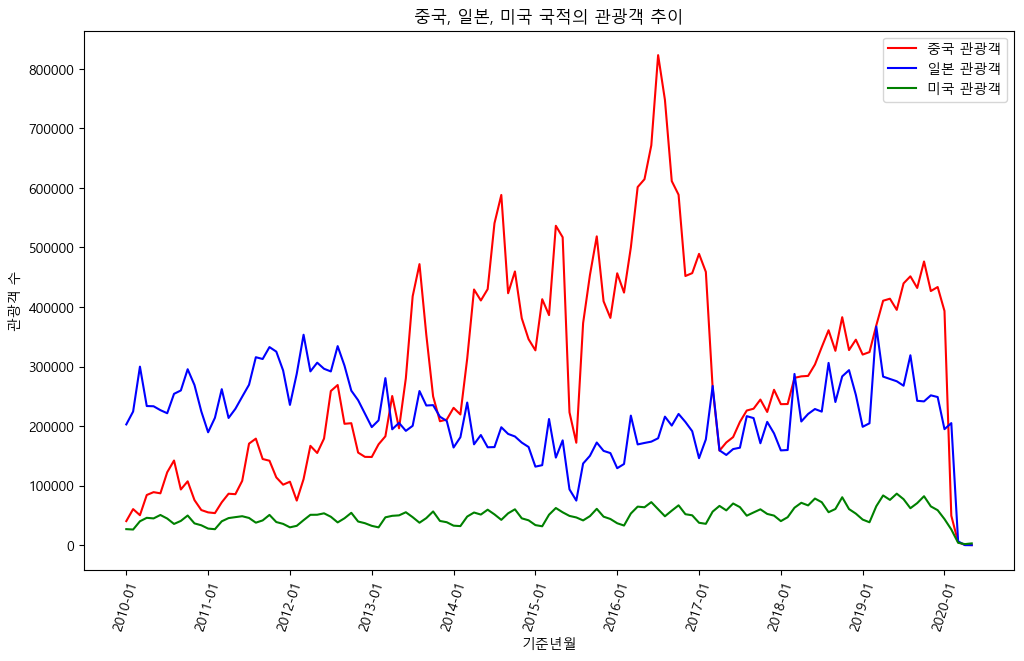

In [97]:
plt.figure(figsize = (12,7))
plt.plot(df_filter['기준년월'], df_filter1['관광'], c = 'r', label = '중국 관광객')
plt.plot(df_filter['기준년월'], df_filter2['관광'], c = 'b', label = '일본 관광객')
plt.plot(df_filter['기준년월'], df_filter3['관광'], c = 'g', label = '미국 관광객')


plt.title('중국, 일본, 미국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')
plt.legend()

plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'], rotation = 72, fontsize = 10)
plt.yticks(range(0,800001,100000))
plt.show()

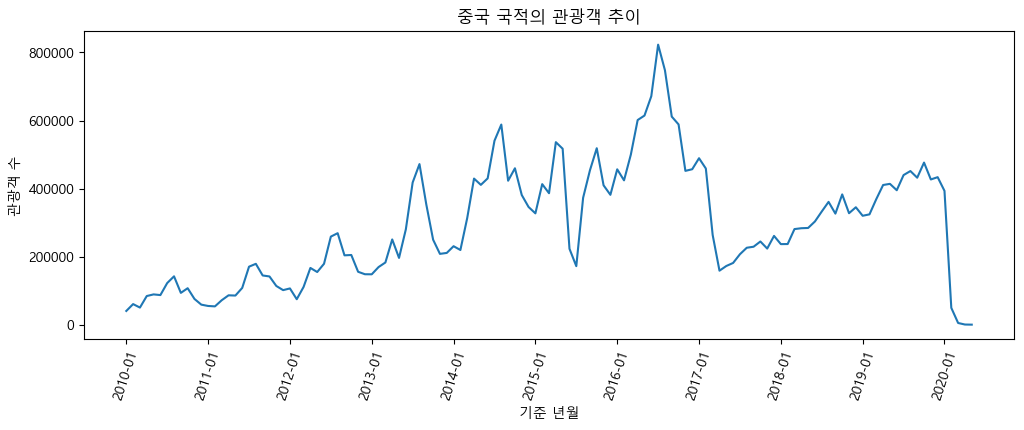

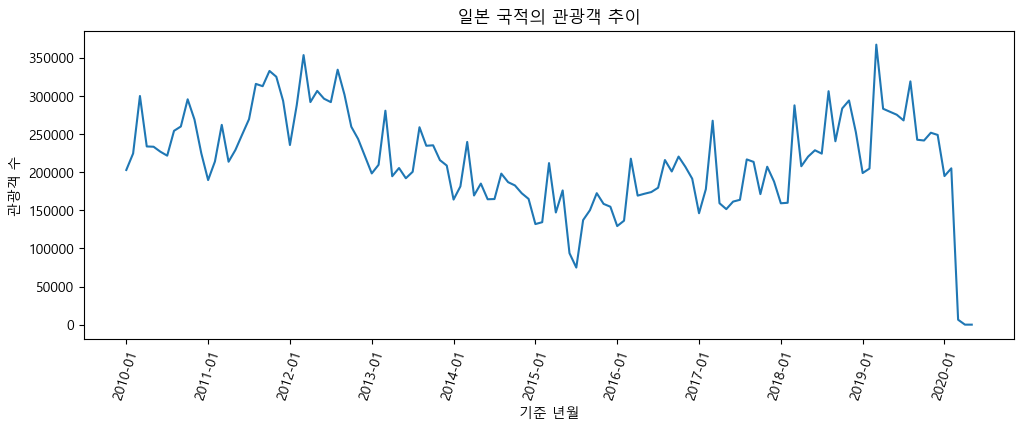

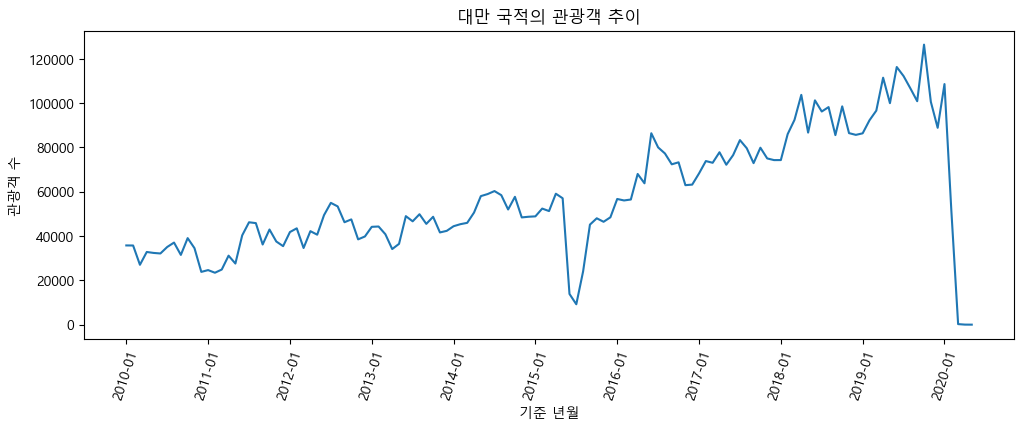

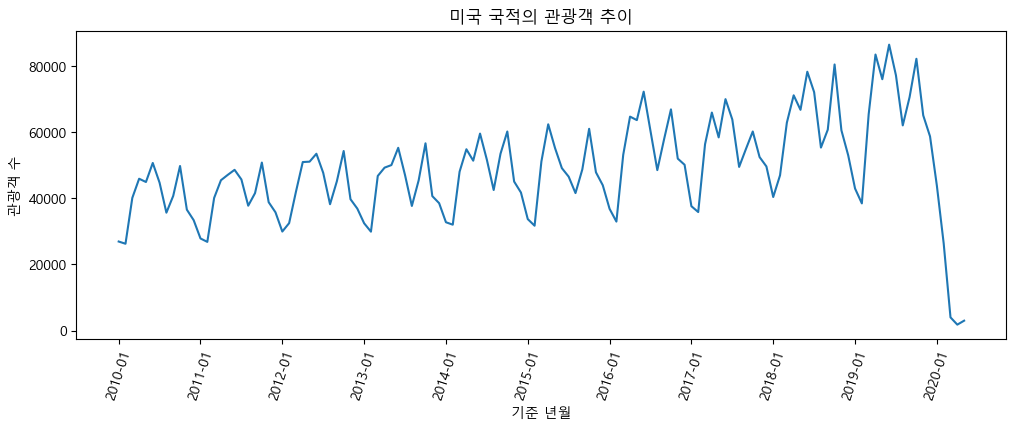

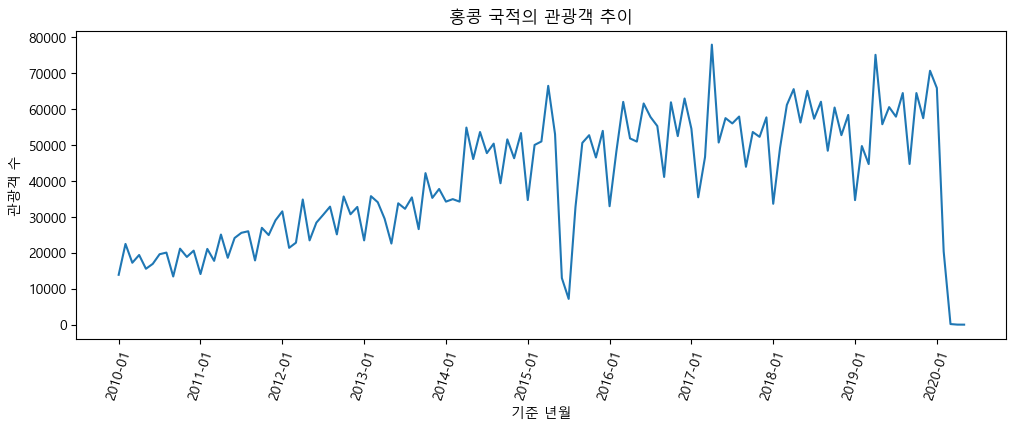

In [100]:
country_list = ['중국', '일본', '대만', '미국', '홍콩']

for country in country_list:
    df_filter = df[df['국적'] == country ]
    
    plt.figure(figsize = (12,4))
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    plt.title('{} 국적의 관광객 추이'.format(country))
    plt.xlabel('기준 년월')
    plt.ylabel('관광객 수')

    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'], rotation = 72, fontsize = 10)
    plt.show()    

### 히트맵

In [101]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [103]:
df['년도'] = df['기준년월'].str.slice(0,4)  # stringslice
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [105]:
df_filter = df[df['국적'] == '중국']

df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


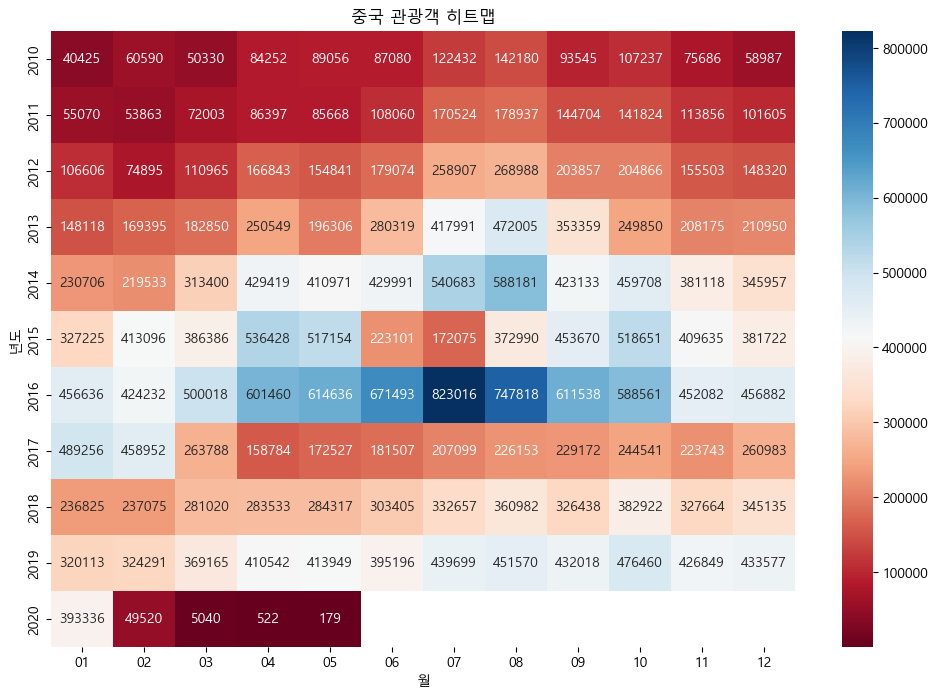

In [106]:
import seaborn as sns
plt.figure(figsize = (12,8))

sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'RdBu')

plt.title('중국 관광객 히트맵')
plt.show()

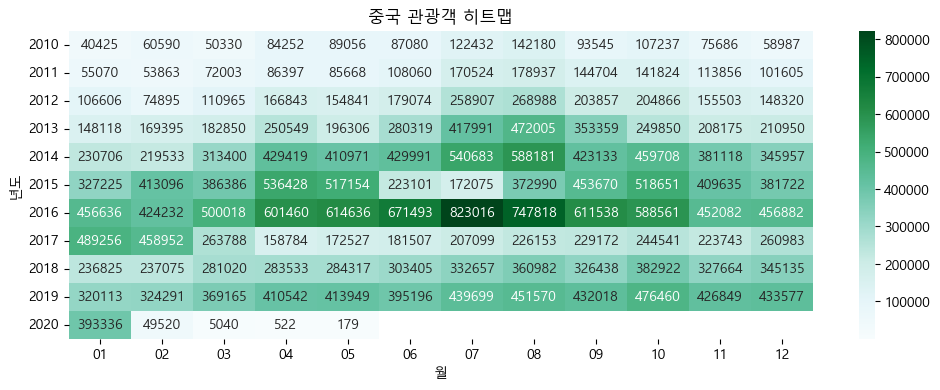

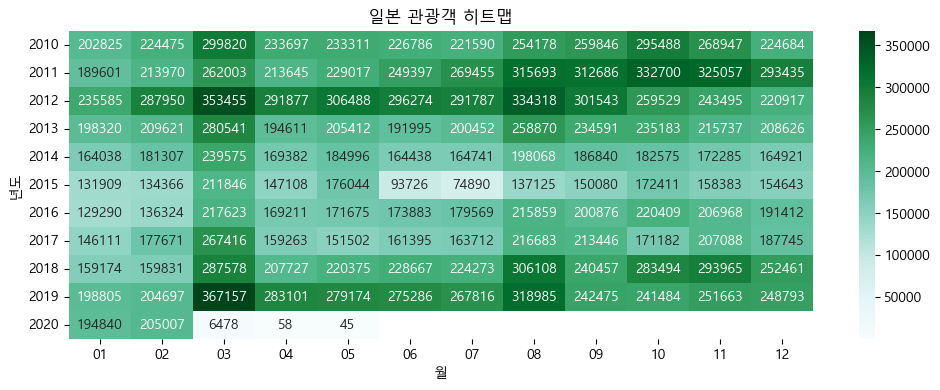

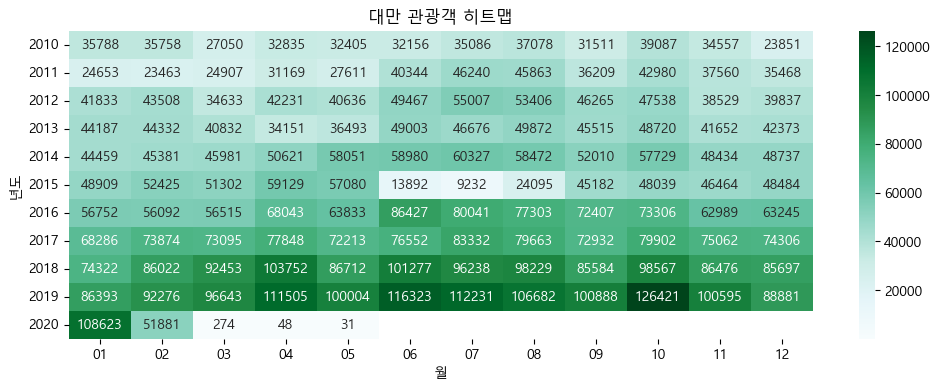

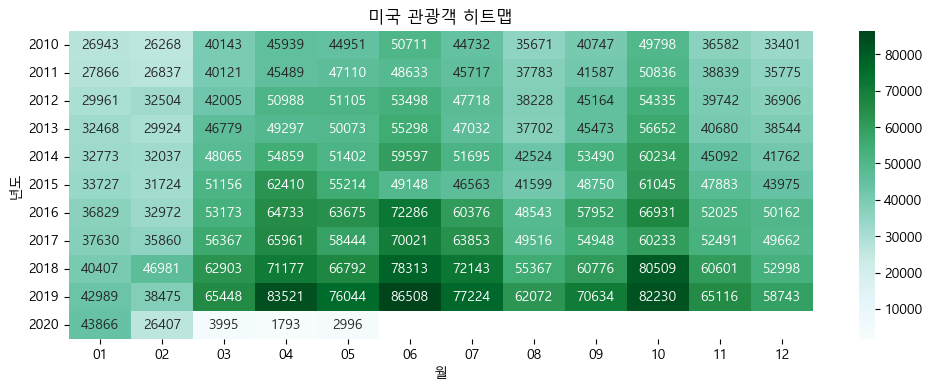

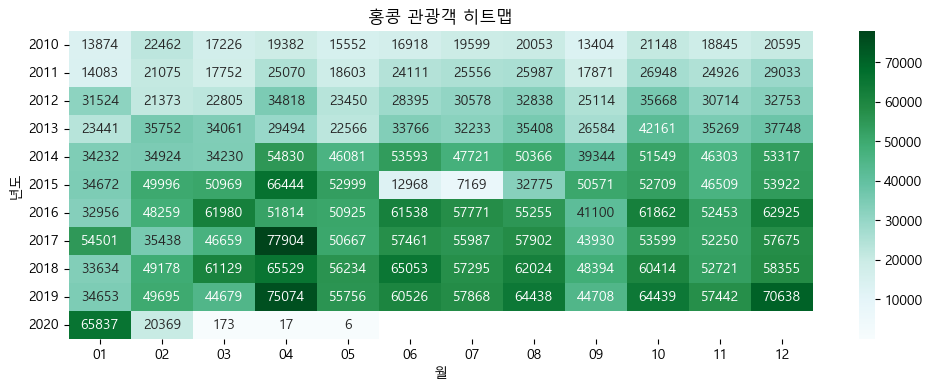

In [109]:
country_list = ['중국', '일본', '대만', '미국', '홍콩']

for country in country_list:
    df_filter = df[df['국적'] == country ]
    df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
    
    plt.figure(figsize = (12,4))
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'BuGn')

    plt.title('{} 관광객 히트맵'.format(country))
    plt.show()

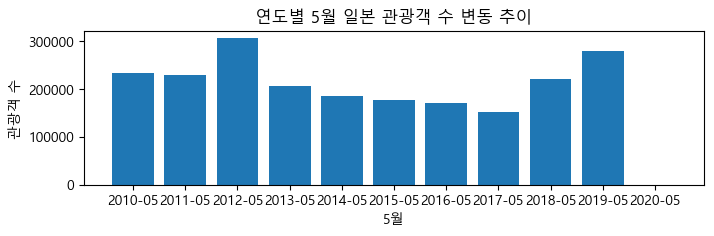

In [110]:
condition_chn = (df['국적'] == '일본') & (df['월'] == '05')
df_chn = df[condition_chn]

plt.figure(figsize = (8,2))
plt.bar(df_chn['기준년월'], df_chn['관광'])

plt.title('연도별 5월 일본 관광객 수 변동 추이')
plt.xlabel('5월')
plt.ylabel('관광객 수')

plt.xticks()

plt.show()

국가 ?  태국
월?  3


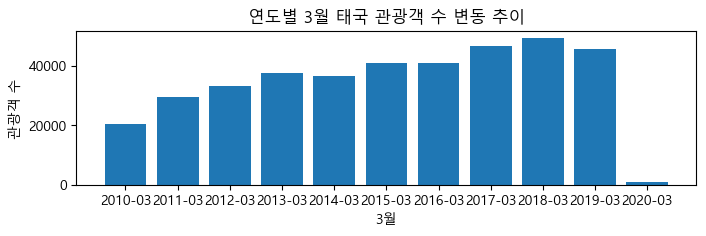

In [128]:
country1 = input ('국가 ? ')
month1 = input ('월? ')
# month2 = month1.zfill(2)

condition_chn = (df['국적'] == country1 ) & (df['월'] == month1.zfill(2))
df_chn = df[condition_chn]

plt.figure(figsize = (8,2))
plt.bar(df_chn['기준년월'], df_chn['관광'])

plt.title('연도별 {}월 {} 관광객 수 변동 추이'.format(month1,country1))
plt.xlabel('{}월'.format(month1))
plt.ylabel('관광객 수')

plt.xticks()

plt.show()